In [5]:
from astropy.io.fits import getdata
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img = getdata('M13V20120711.fits')

In [4]:
img.shape

(951, 951)

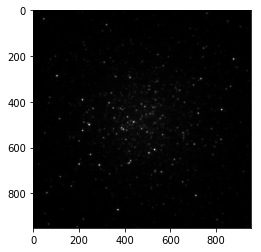

In [6]:
plt.imshow(img, cmap='gray')

In [8]:
from PIL import Image
file = Image.fromarray(img)
file = file.convert('RGB')
file.save('test.png')

In [9]:
data = Image.open('test.png')

In [11]:
data = np.array(data)

In [12]:
data.shape

(951, 951, 3)

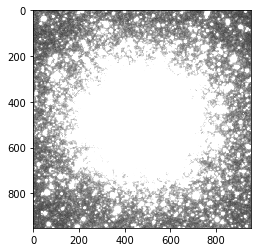

In [13]:
plt.imshow(data)

## Viewing subtracted PNG images

In [1]:
def get_png_data(filename):
    """
    Get the PNG data for the given FITS file
    
    Args:
        filename: Path to the FITS file
    """
    data = getdata(filename)
    data = data.byteswap().newbyteorder()
    
    file = Image.fromarray(data)
    file = file.convert('L')  # black and white
    file.save('test.png')
    
    png_data = Image.open('test.png')
    png_data = np.array(png_data)
    
    return png_data

In [6]:
ref_png = get_png_data('M13Vreferencefr.fits')
dat_png = get_png_data('M13V20120711.fits')

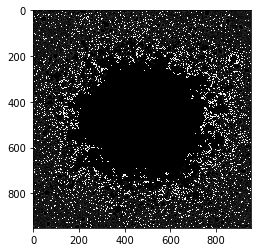

In [8]:
plt.imshow(dat_png - ref_png, cmap='gray');

In [10]:
sub_png = dat_png - ref_png

In [11]:
sub_png

array([[12, 25, 22, ..., 34, 32, 10],
       [ 3, 16, 13, ..., 28, 33, 35],
       [11, 13, 29, ..., 28, 19, 29],
       ...,
       [29, 25, 33, ..., 23, 27, 20],
       [20, 23, 29, ..., 25, 22, 30],
       [18, 23, 30, ..., 24, 31, 19]], dtype=uint8)

## Checking the FITS versions

In [14]:
ref = getdata('M13Vreferencefr.fits')

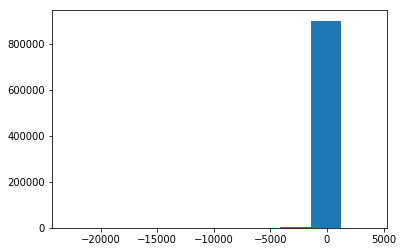

In [18]:
plt.hist((img - ref).flatten());